Lê Nguyễn Gia Huy - K214130918

Exercise 1: Immigration to Canada from 1980 to 2013 (ng nhập cư đến Canada từ 1980-2013)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. The Dataset: Immigration to Canada from 1980 to 2013

In [2]:
# canada_df = pd.read_excel("https://bit.ly/32HXvZB", sheet_name='Canada by Citizenship' , skiprows=range(20), skipfooter=2)

In [3]:
canada_df = pd.read_excel('C:\\Users\\LENOVO\\2_uel\\DV_exercises_lms\\canada_data.xlsx', sheet_name='Canada by Citizenship'
                          , skiprows=range(20)
                          , skipfooter=2)
canada_df.head(3)

# file excel có 3 sheet --> chỉ đọc sheet 'Canada by Citizenship'
# skiprows=range(20) bỏ qua 20 hàng đầu tiên
# skipfooter=2 bỏ qua 2 hàng cuối 

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331


In [4]:
# chỉ giữ lại các cột 'OdName', 'AreaName', 'RegName', 'DevName'
canada_df.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True) # (inplace=True) tương đương canada_df = canada_df.drop(['AREA','REG','DEV','Type','Coverage'], axis=1)

In [5]:
# check xem tất cả các tên cột có cùng 1 kiểu dữ liệu str ko
all(isinstance(item, str) for item in canada_df.columns)

False

In [6]:
# đổi tất cả các tên cột thành dạng str
canada_df.columns = list(map(str, canada_df.columns))

In [7]:
# thêm 1 cột 'Total' tống số người nhập cư của mỗi quốc gia (Odname) từ 1980-2013
canada_df['Total'] = canada_df.sum(axis=1)
# axis=1: cộng theo chiều ngang (theo row)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12016\399887815.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  canada_df['Total'] = canada_df.sum(axis=1)


**Question 1 & 2 Plot a line graph of immigration from Haiti**

In [8]:
haiti_df = canada_df.loc[ canada_df['OdName'] == 'Haiti']
haiti_df

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
75,Haiti,Latin America and the Caribbean,Caribbean,Developing regions,1666,3692,3498,2860,1418,1321,...,1682,1619,1598,2491,2080,4744,6503,5868,4152,84813


In [9]:
years = list(map(str, range(1980, 2014)))

In [10]:
haiti_df = haiti_df[years].transpose()
haiti_df = haiti_df.rename(columns={75:'Number of immigrants'})
haiti_df.index = haiti_df.index.map(int)

haiti_df.head()

,Number of immigrants
1980,1666
1981,3692
1982,3498
1983,2860
1984,1418


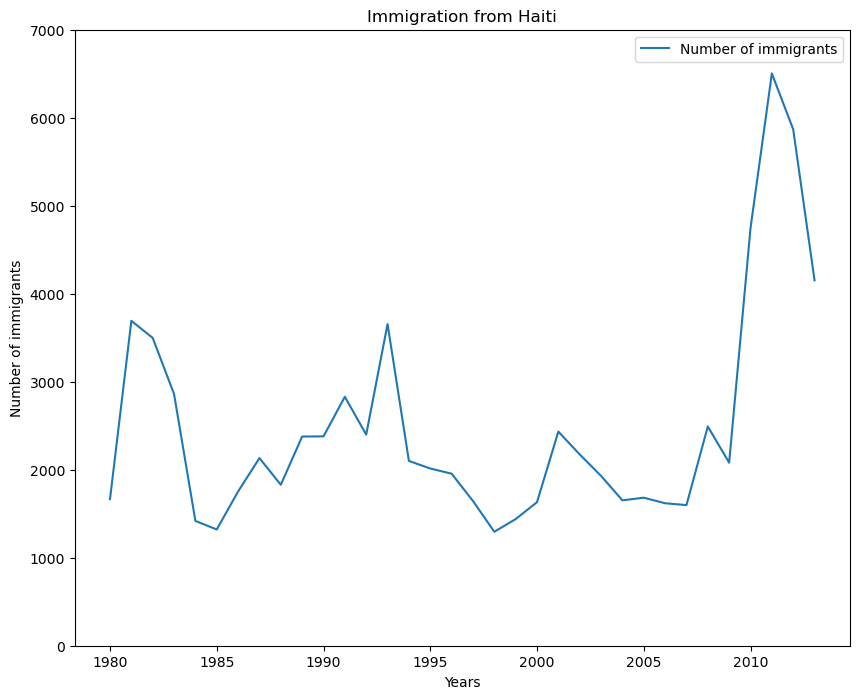

In [11]:
haiti_df.plot(kind='line', figsize=(10, 8))

plt.title("Immigration from Haiti")
plt.xlabel("Years")
plt.ylabel("Number of immigrants")

# plt.xlim(1980,2013)
plt.ylim(0,7000);

**Question 3:  Annotate '2010 Earthquake' in the plot**

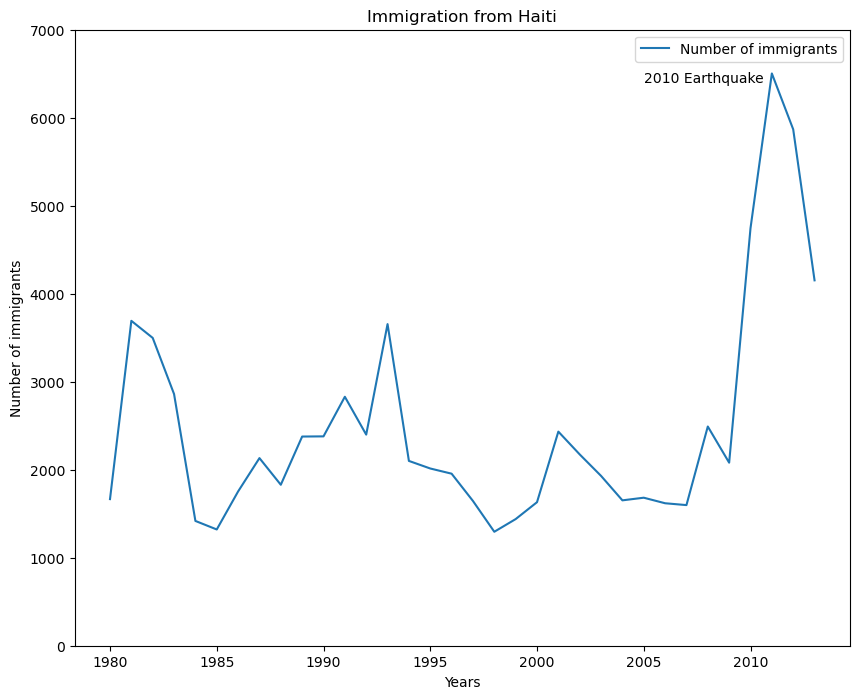

In [12]:
haiti_df.plot(kind='line', figsize=(10, 8))

plt.title("Immigration from Haiti")
plt.xlabel("Years")
plt.ylabel("Number of immigrants")

# plt.xlim(1980,2013)
plt.ylim(0,7000)
plt.annotate('2010 Earthquake',xy=(2005, 6400));

**Question 4. Compare the number of immigrants from India and China
from 1980 to 2013**

In [13]:
india_china_df = canada_df.loc[(canada_df['OdName'] == 'India')  |  (canada_df['OdName'] == 'China')]

In [14]:
india_china_df

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
36,China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
79,India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904


In [15]:
india_china_df = india_china_df[years].transpose()
india_china_df = india_china_df.rename(columns={36:'China', 79:'India'})
india_china_df.index = india_china_df.index.map(int)

In [16]:
india_china_df.head(5)

,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


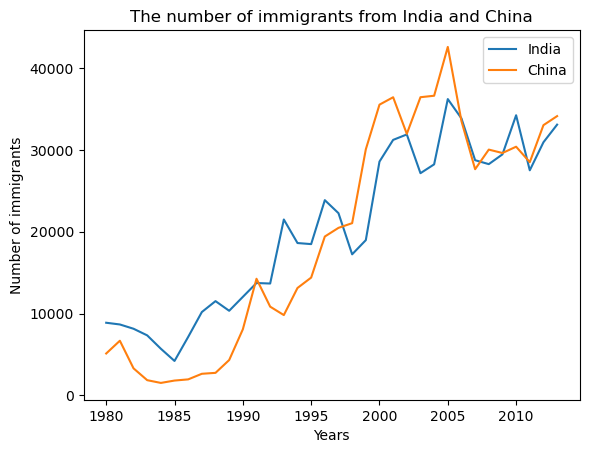

In [17]:
plt.title("The number of immigrants from India and China")
plt.xlabel("Years")
plt.ylabel("Number of immigrants")


plt.plot(india_china_df['India'], label = "India")
plt.plot(india_china_df['China'], label = "China")
plt.legend()
plt.show()

# 2. Rename some of the columns so that they make sense

In [18]:
canada_df.rename(columns={'OdName':'Country',
'AreaName':'Continent','RegName':'Region'}, inplace=True)

In [19]:
# canada_df.set_index('Country', inplace=True)

In [20]:
canada_df.sort_values(['Total'], ascending=False, axis=0, inplace=True)
# sắp xếp theo cột 'Total' giảm dần

# get the top 5 entries
top5_country = canada_df.head()
top5_country

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
79,India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
36,China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
183,United Kingdom of Great Britain and Northern I...,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
136,Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
130,Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [21]:
# transpose the dataframe
top5_country = top5_country[years].transpose()

top5_country.rename(columns = {79:'India', 36: 'China', 183: 'United Kingdom of Great Britain and Northern I...'
                    , 136: 'Philippines', 130:'Pakistan'}, inplace=True)

top5_country.head(5)

,India,China,United Kingdom of Great Britain and Northern I...,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


**Create a line plot that visualized the top 5 countries that contribued the most
immigrants to Canada from 1980 to 2013.**

**Question 1: Produce the area plots (set stacked=False)**

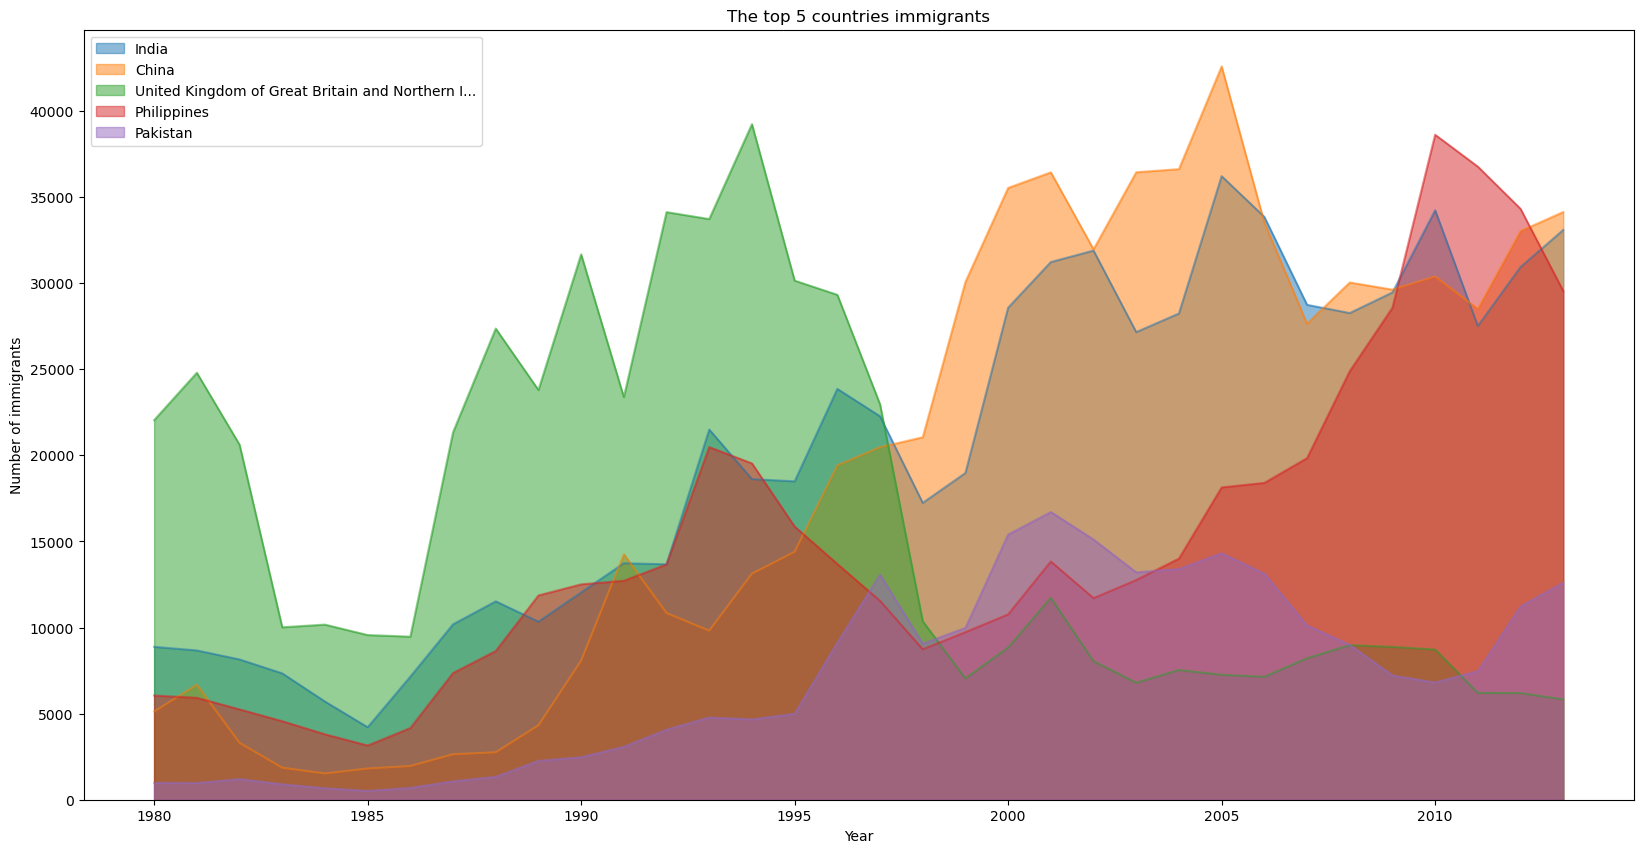

In [22]:
ax = top5_country.plot.area(stacked=False, figsize=(20, 10)) ### ko cho xếp chồng lên nhau (có thể nhìn xuyên qua nhau)

plt.xlabel('Year')
plt.ylabel('Number of immigrants')
plt.title('The top 5 countries immigrants');

**Question 2: Produce similar area plots for the bottom five countries which
have immigrants to Canada.**

In [23]:
# tương tự với 5 quốc gia có ít người nhập cư đến Canada nhất
canada_df.sort_values(['Total'], ascending=True, axis=0, inplace=True)

bottom5_country = canada_df.head()
bottom5_country

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
131,Palau,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
109,Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2
123,New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,5
149,San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,5


In [24]:
bottom5_country = bottom5_country[years].transpose()

bottom5_country.rename(columns = {131:'Palau', 191: 'Western Sahara', 109: 'Marshall Islands'
                    , 123: 'New Caledonia', 149:'San Marino'}, inplace=True)

bottom5_country.head(5)

,Palau,Western Sahara,Marshall Islands,New Caledonia,San Marino
1980,0,0,0,0,1
1981,0,0,0,0,0
1982,0,0,0,0,0
1983,0,0,0,0,0
1984,0,0,0,0,0


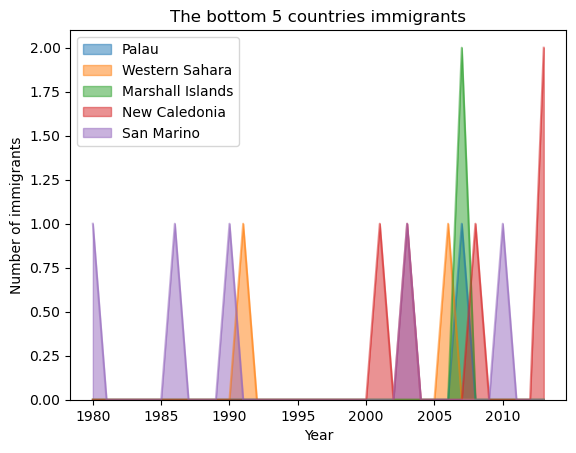

In [25]:
ax = bottom5_country.plot.area(stacked=False) ### ko cho xếp chồng lên nhau (có thể nhìn xuyên qua nhau)

plt.xlabel('Year')
plt.ylabel('Number of immigrants')
plt.title('The bottom 5 countries immigrants');

# 3. What is the frequency distribution of the number of new immigrants from the various countries to Canada in 2013 ?

Before we proceed with creating the histogram plot, let’s first examine the data split into intervals. 
To do this, we will us Numpy’s histrogram method to get the bin ranges and frequency counts.

In [26]:
canada_df = canada_df.set_index('Country')
canada_df["2013"].head()

Country
Palau               0
Western Sahara      0
Marshall Islands    0
New Caledonia       2
San Marino          0
Name: 2013, dtype: int64

In [27]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(canada_df["2013"])

In [28]:
count # frequency count

array([178,  11,   1,   2,   0,   0,   0,   0,   1,   2], dtype=int64)

In [29]:
bin_edges # bin ranges, default = 10 bins

array([    0. ,  3412.9,  6825.8, 10238.7, 13651.6, 17064.5, 20477.4,
       23890.3, 27303.2, 30716.1, 34129. ])

**Question 1: Use pandas plot to produce a histogram for Canada in 2013**

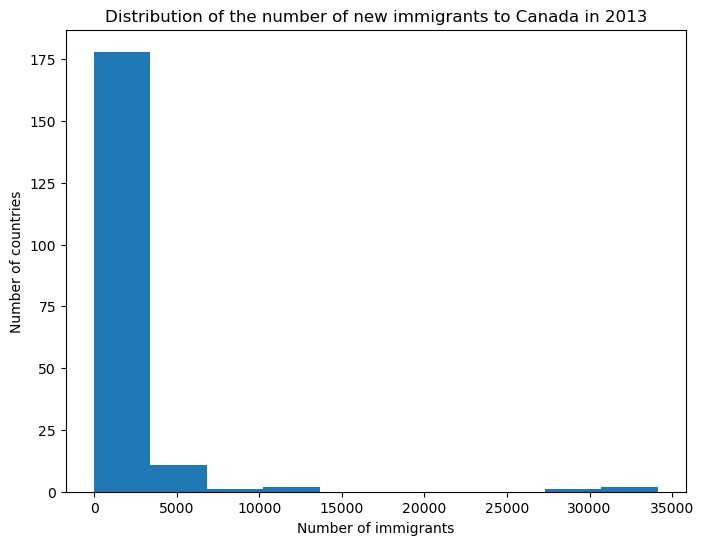

In [30]:
canada_df["2013"].plot(kind='hist', figsize=(8, 6))

plt.xlabel('Number of immigrants')
plt.ylabel('Number of countries')
plt.title('Distribution of the number of new immigrants to Canada in 2013');

**Question 2: Use pandas plot and the bin edges to produce a histogram for
Canada in 2013**

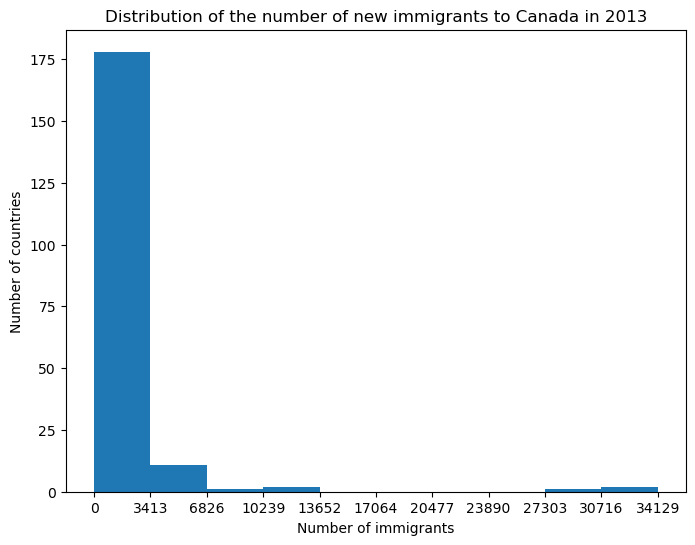

In [31]:
canada_df["2013"].plot(kind='hist', figsize=(8, 6),xticks=bin_edges)

plt.xlabel('Number of immigrants')
plt.ylabel('Number of countries')
plt.title('Distribution of the number of new immigrants to Canada in 2013');

# 4) What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013 ?

In [32]:
three_countries_df = canada_df.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

In [33]:
three_countries_df.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


In [34]:
count, bin_edges = np.histogram(three_countries_df)

In [35]:
count

array([12, 27, 20, 13, 10, 11,  4,  0,  1,  4], dtype=int64)

In [36]:
bin_edges

array([ 31. ,  58.7,  86.4, 114.1, 141.8, 169.5, 197.2, 224.9, 252.6,
       280.3, 308. ])

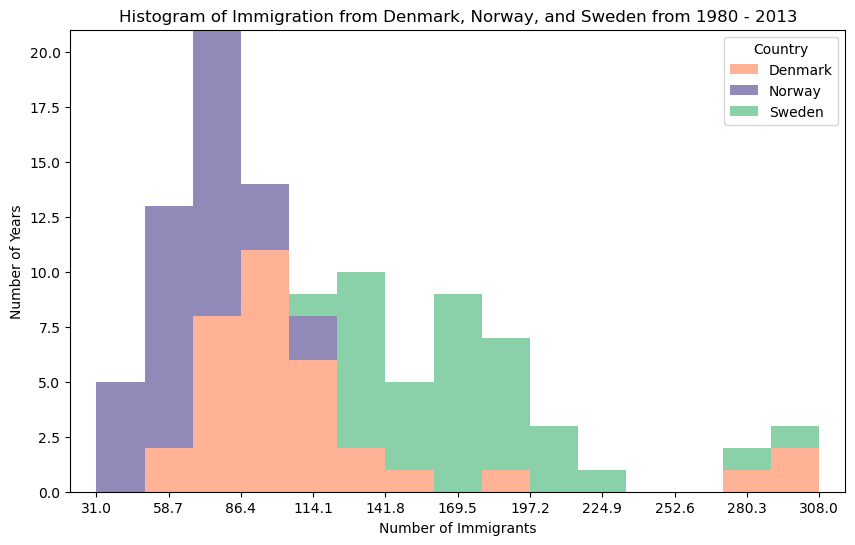

In [37]:
# generate histogram

xmin = bin_edges[0] - 10 # bin đầu: 31.0  trục x min : 21

xmax = bin_edges[-1] + 10 # bin cuối: 308 trục x max : 318

three_countries_df.plot(kind='hist', figsize=(10, 6)
                        , bins=15, alpha=0.6
                        , xticks=bin_edges
                        , color=['coral', 'darkslateblue', 'mediumseagreen']
                                 , stacked=True
                                 ,xlim=(xmin, xmax))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.show()


**Question: Display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013 ? Use an overlapping plot with 15 bins and a transparency value of 0.35.**

In [38]:
new_three_countries_df = canada_df.loc[['Greece', 'Albania', 'Bulgaria'], years].transpose()

new_three_countries_df.head()

Country,Greece,Albania,Bulgaria
1980,1065,1,24
1981,953,0,20
1982,897,0,12
1983,633,0,33
1984,580,0,11


In [39]:
count, bin_edges = np.histogram(new_three_countries_df)

In [40]:
count

array([44,  6, 16, 12,  8,  5,  3,  5,  2,  1], dtype=int64)

In [41]:
bin_edges

array([   0. ,  202.2,  404.4,  606.6,  808.8, 1011. , 1213.2, 1415.4,
       1617.6, 1819.8, 2022. ])

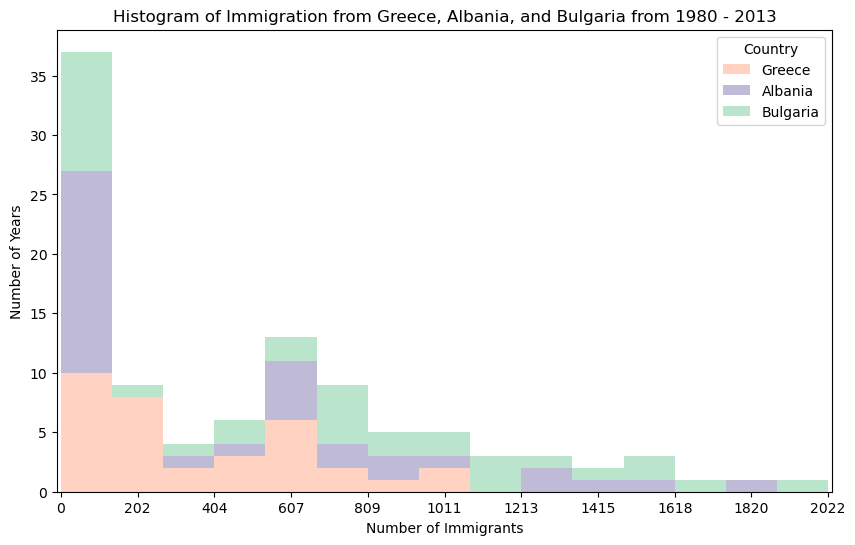

In [42]:
xmin = bin_edges[0] - 10 

xmax = bin_edges[-1] + 10 

new_three_countries_df.plot(kind='hist', figsize=(10, 6), bins=15, alpha=0.35
                        , xticks=bin_edges
                        , color=['coral', 'darkslateblue', 'mediumseagreen']
                                 , stacked=True
                                 ,xlim=(xmin, xmax))

plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.show()

# 5. Bar Charts

**Vertical bar plot**

In [43]:
iceland_df = canada_df.loc['Iceland', years]
iceland_df.head()


1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

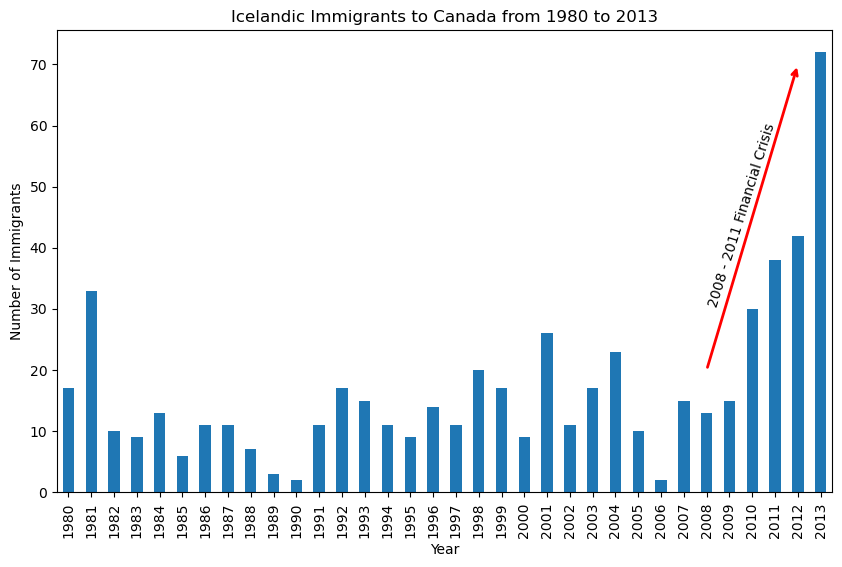

In [44]:
iceland_df.plot(kind='bar', figsize=(10, 6), rot=90) 

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=2)
            )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis', # text to display
             xy=(28, 30),                    # start the text at at point (year 2008 , pop 30)
             rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )

plt.show()

The number of immigrants to Canada started increasing rapidly after 2008.

**Horizontal Bar Plot**

**Question: Create a horizontal bar plot showing the total number of immigrants to
Canada from the top 15 countries, for the period 1980 - 2013. Label each country
with the total immigrant count.**



• Use kind=’barh’ to generate a bar chart with horizontal bars.
• Make sure to choose a good size for the plot and to label your axes and to give
the plot a title.
• Loop through the countries and annotate the immigrant population using the
anotate function of the scripting interface

In [45]:
# canada_df.sort_values(['Total'], ascending=False, axis=0)
top15_ser = canada_df['Total'].sort_values(ascending=False, axis=0)[:15]

top15_df = pd.DataFrame(top15_ser)
top15_df.head()

,Total
Country,
India,691904
China,659962
United Kingdom of Great Britain and Northern Ireland,551500
Philippines,511391
Pakistan,241600


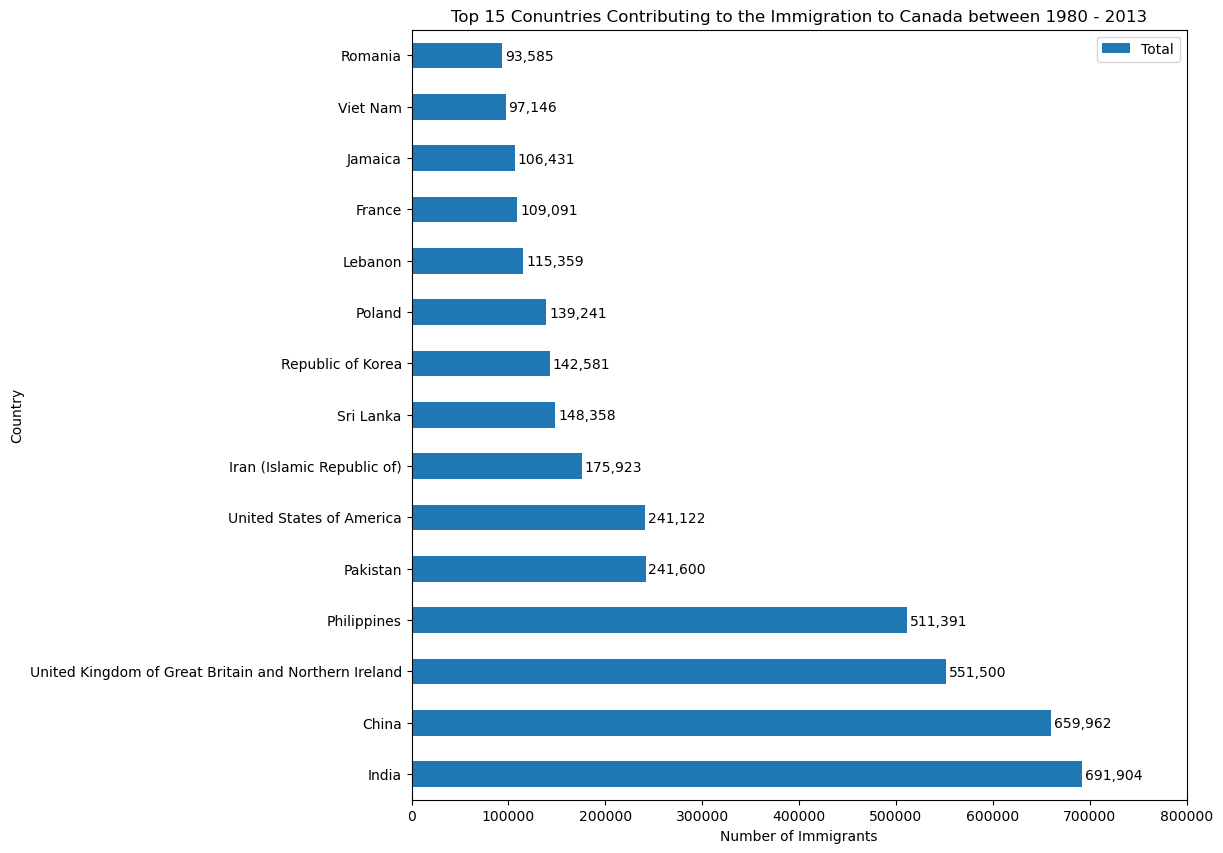

In [48]:

top15_df.plot(kind='barh', figsize=(10, 10))

plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

# annotate value labels to each country

for index, value in enumerate(top15_df["Total"]): 
#     print(index,value)
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value + 3000, index - 0.1), color='black')

plt.xlim(0,800000)
plt.show()